# Plotting INBOX messages remaining, by date

I tend to use my inbox as a clearing house for all the things, and periodically go through and clean out old messages. When I go through it I often notice that there are clumps of e-mail that haven't been triaged that co-occur with busy times in my life. As a way of procrastinating dealing with my e-mail, I decided to try plotting my inbox messages by date... et voila!

HT to [hitzg and Will Vousden on stackoverflow](https://stackoverflow.com/questions/29672375/histogram-in-matplotlib-time-on-x-axis) and [Will Koehrsen's density plot tutorial](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0).

In [1]:
%matplotlib inline

In [2]:
import mailbox, email, time
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


In [3]:
INBOX_LOCATION = '../../TecklaMail/INBOX'
N_MESSAGES = 0

In [4]:
inbox = mailbox.Maildir(INBOX_LOCATION)

message_dates = []
for n, k in enumerate(inbox):
    datetuple = email.utils.parsedate(k['date'])
    timeobj = time.mktime(datetuple)
    message_dates.append(timeobj)
    
    if n % 500 == 0:
        print('...', n)
    
    if N_MESSAGES and n >= N_MESSAGES:
        break

print('done reading {} messages'.format(n))

... 0
... 500
... 1000
... 1500
... 2000
... 2500
... 3000
... 3500
... 4000
... 4500
... 5000
... 5500
... 6000
... 6500
... 7000
... 7500
... 8000
... 8500
... 9000
... 9500
... 10000
... 10500
... 11000
... 11500
... 12000
... 12500
... 13000
... 13500
... 14000
... 14500
... 15000
... 15500
done reading 15920 messages


/Users/t/dev/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


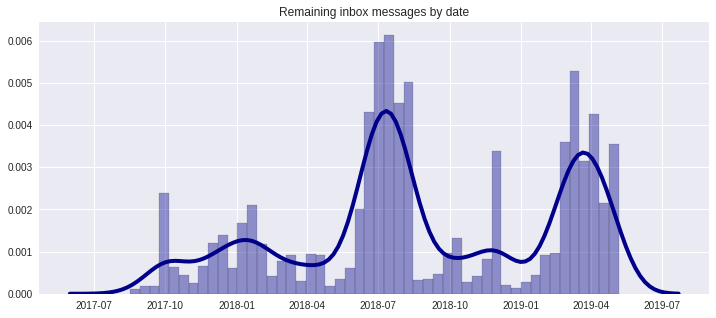

In [6]:
import seaborn as sns

mpl_data = mdates.epoch2num(message_dates)

fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.distplot(mpl_data, hist=True, kde=True, 
             bins=int(50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))

plt.title('Remaining inbox messages by date')

plt.savefig('maildates.png')
plt.show()
